**Задача 3.** *Моделирование выборки из абсолютно непрерывного закона распределения методом обратных функций.*

Задание. 
1. Для данного n методом обратных функций смоделируйте выборку из закона распределения с заданной плотностью $p(x)$.
2. Для полученной выборки найдите гистограмму относительных частот.  Постройте на одном рисунке графики теоретической плотности $p(x)$ и гистограмму относительных частот.
3. Вычислите выборочное среднее и выборочную дисперсию и сравните с истинными значениями этих характеристик.
4. Используя неравенство *Dvoretzky-Kiefer-Wolfowitz*, постройте 90% доверительный интервал для функции распределения $F(x)$.

Вариант 8

Плотность распределения теоретического закона - Вейбулл $p(x)=2.5\cdot x^{1.5}\cdot e^{-x^{2.5}}, x>0$

Объем выборки n=120

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import log2, trunc, log, gamma, sqrt

Запишем функцию распределения Вебулла, его плотность распределения и обратную функцию
Функция распределения имеет вид:
$$F(x) =  \begin{cases}1-e^{-x^{c}}, x\geq 0\\0, x<0\end{cases}$$
Тогда обратная функция имеет вид:
$${F(y)}^{-1} = \sqrt[c]{-ln(1-y)}$$

In [2]:
def p_weibull(x, c):
    return c * x ** (c - 1) * np.exp(-x ** c)

def inv_weibull(y, c):
    return (-log(1 - y)) ** (1/c)

def weibull(x, c):
    return 1 - np.exp(-x**c)

Зададим объем выборки и параметр $c$ закона Вейбулла

In [3]:
n = 120
c = 2.5

Сгенерирую 120 случайных чисел из $[0, 1]$

In [4]:
#y = np.random.rand(12, 10)
#pd.DataFrame(y).to_csv('task3_best.csv', header=None, sep=' ', index=False)
y = np.array(pd.read_csv('task3_best.csv', header=None, sep=' '), dtype=np.float64)
pd.DataFrame(y)

,0,1,2,3,4,5,6,7,8,9
0,0.733109,0.763970,0.826857,0.076061,0.223970,0.277856,0.226866,0.968547,0.369257,0.201811
1,0.839988,0.171759,0.410495,0.320929,0.973846,0.816189,0.350197,0.836133,0.556650,0.864093
2,0.751511,0.291756,0.943459,0.800566,0.349988,0.271782,0.237294,0.996731,0.506431,0.688984
3,0.426524,0.165296,0.383983,0.637794,0.073867,0.691040,0.081325,0.560316,0.088715,0.443042
4,0.482085,0.863883,0.675609,0.173983,0.811563,0.492151,0.388849,0.275577,0.411366,0.311347
5,0.988423,0.610737,0.195836,0.383709,0.585420,0.987848,0.341465,0.004160,0.193257,0.782837
6,0.166805,0.857500,0.849247,0.600355,0.538371,0.170535,0.416356,0.714802,0.129560,0.275103
7,0.082157,0.809122,0.623134,0.539648,0.063821,0.238623,0.841230,0.551047,0.679460,0.807023
8,0.278529,0.685202,0.027996,0.498054,0.463710,0.662754,0.581432,0.298732,0.736897,0.991003
9,0.796480,0.201569,0.073453,0.481590,0.391547,0.630129,0.352650,0.186496,0.163566,0.231942


Воспользуемся методом обратной функции и смоделируем закон Вейбулла с параметром c = 2.5

In [5]:
X = np.zeros((12, 10), dtype=np.float64)
for i in range(y.shape[0]):
    for j in range(y.shape[1]):
        X[i][j] = inv_weibull(y[i][j], c)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,1.117764,1.158250,1.251918,0.362487,0.577610,0.638317,0.581002,1.642834,0.733545,0.551048
1,1.274143,0.512955,0.774835,0.684065,1.677331,1.234666,0.714209,1.267496,0.920705,1.318394
2,1.141564,0.653297,1.525181,1.210529,0.713996,0.631697,0.593079,2.009348,0.870051,1.064055
3,0.790755,0.504386,0.748360,1.006189,0.358098,1.066467,0.372739,0.924454,0.386549,0.807126
4,0.845815,1.317986,1.048541,0.515870,1.227387,0.855819,0.753236,0.635839,0.775700,0.674050
5,1.818376,0.977005,0.543682,0.748085,0.950363,1.810444,0.705280,0.111691,0.540472,1.184534
6,0.506399,1.305787,1.290561,0.966010,0.902132,0.511344,0.780661,1.094960,0.453838,0.635322
7,0.374328,1.223593,0.990275,0.903425,0.337040,0.594603,1.276307,0.914993,1.052976,1.220355
8,0.639048,1.059636,0.240603,0.861696,0.827594,1.033910,0.946217,0.660732,1.122587,1.858828
9,1.204415,0.550751,0.357262,0.845324,0.755936,0.997836,0.716709,0.531971,0.502065,0.586907


Построим гистограмму

In [6]:
print('Min: ', X.min())
print('Max: ', X.max())
print('Размах: ', X.max()-X.min())

l = 1 + trunc(log2(X.shape[0] * X.shape[1]))
print('Количество интервалов: ', l)

h = (X.max() - X.min()) / l
print('h: ', h)

Min:  0.1116914809016
Max:  2.009347913002261
Размах:  1.8976564321006608
Количество интервалов:  7
h:  0.2710937760143801


In [7]:
def count(data, beg, h):
  c = 0
  for i in range(data.shape[0]):
    for j in range(data.shape[1]):
      if data[i][j] < beg + h and data[i][j] >= beg:
        c += 1
  return c

f = np.zeros((0, 2))
step = X.min() 
while step < X.max():
  val = count(X, step, h)
  
  f = np.vstack((f, [step, val]))
  step += h
print('Гистограмма')
pd.DataFrame(data=f)

Гистограмма


,0,1
0,0.111691,10.0
1,0.382785,30.0
2,0.653879,34.0
3,0.924973,25.0
4,1.196067,14.0
5,1.467160,3.0
6,1.738254,3.0
7,2.009348,1.0


In [8]:
p = np.array(pd.DataFrame(data=f)[1]) / (X.shape[0] * X.shape[1])
f1 = p / h
int_ = np.array(pd.DataFrame(data=f)[0])
int1 = int_
print('Массив координат центра столбцов гистограммы')
pd.DataFrame(data=int1, columns=['int1'])

Массив координат центра столбцов гистограммы


,int1
0,0.111691
1,0.382785
2,0.653879
3,0.924973
4,1.196067
5,1.467160
6,1.738254
7,2.009348


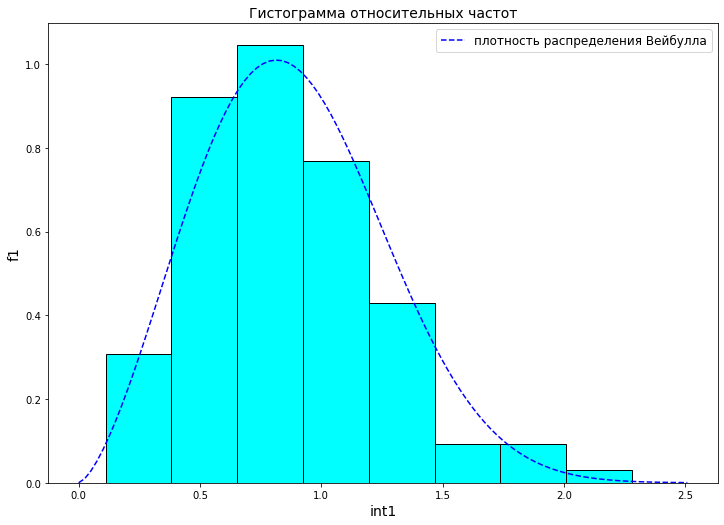

In [9]:
def draw_hystogram(int1, f1):
    x = int1
    y = f1
    
    fig, ax = plt.subplots()
    
    # строю гистограмму
    ax.bar(x, y, width=h, color='cyan', edgecolor='black', align='edge')
    
    # строю функцию плотности распределения Вейбулла
    xlist = np.linspace(0, X.max() + 0.5, 100)
    ylist = [p_weibull(i, c) for i in xlist]
    ax.plot(xlist, ylist, c='blue', linestyle='--', label='плотность распределения Вейбулла')
    
    ax.set_ylabel('f1', fontsize=14)
    ax.set_xlabel('int1', fontsize=14)
    ax.set_title('Гистограмма относительных частот', fontsize=14)
    
    fig.set_figwidth(12)
    fig.set_figheight(12/ 1.42)
    
    plt.legend(fontsize=12)
    plt.show()

draw_hystogram(int1, f1)

In [10]:
print('Выборочное среднее: ', round(X.mean(), 3))
print('Выборочная дисперсия: ', round(X.var(ddof=1), 3))
print('Теоретическое мат ожидание:', round(gamma(1 + 1/c), 3))
print('Теоретическая дисперсия:', round(gamma(1+2/c) - gamma(1+1/c) ** 2, 3))

Выборочное среднее:  0.857
Выборочная дисперсия:  0.132
Теоретическое мат ожидание: 0.887
Теоретическая дисперсия: 0.144


Построим эмпирическую функцию распределения

In [11]:
val = np.zeros((n,))
u = np.array(weibull(np.linspace(X.min(), X.max(), 120), c))
X = X.reshape(120, )
y = y.reshape(120, )
for i in range(n):
    for j in range(n):
        if y[i] < u[j]:
            val[j] += 1
            break
        if j == n - 1:
            val[j] += 1
cum = np.zeros((n,))
cum[0] = val[0]
for i in range(1, n):
    cum[i] = cum[i - 1] + val[i]
cum /= n
print('Кумулятивный массив:\n', cum)

Кумулятивный массив:
 [0.         0.00833333 0.00833333 0.00833333 0.00833333 0.00833333
 0.00833333 0.00833333 0.00833333 0.01666667 0.025      0.025
 0.025      0.03333333 0.03333333 0.04166667 0.06666667 0.08333333
 0.09166667 0.09166667 0.1        0.10833333 0.13333333 0.13333333
 0.13333333 0.15833333 0.18333333 0.2        0.225      0.23333333
 0.26666667 0.28333333 0.28333333 0.30833333 0.33333333 0.34166667
 0.35833333 0.35833333 0.39166667 0.4        0.41666667 0.43333333
 0.45833333 0.475      0.49166667 0.50833333 0.50833333 0.54166667
 0.55833333 0.575      0.59166667 0.61666667 0.61666667 0.64166667
 0.65       0.65833333 0.68333333 0.69166667 0.7        0.71666667
 0.76666667 0.76666667 0.775      0.775      0.79166667 0.8
 0.80833333 0.80833333 0.825      0.84166667 0.86666667 0.875
 0.88333333 0.9        0.91666667 0.925      0.94166667 0.94166667
 0.94166667 0.94166667 0.94166667 0.94166667 0.94166667 0.94166667
 0.94166667 0.94166667 0.94166667 0.94166667 0.94166667 0

Определим функции рассчета доверительного интервала и сам доверительный интервал

In [12]:
def R(cum, i, epsilon):
    return cum[i] + epsilon if cum[i] + epsilon < 1 else 1

def L(cum, i, epsilon):
    return cum[i] - epsilon if cum[i] - epsilon > 0 else 0

alpha = 0.1
epsilon = sqrt((-1)/(2*n)*log(alpha/2))
print('Epsilon:', round(epsilon, 3))

Epsilon: 0.112


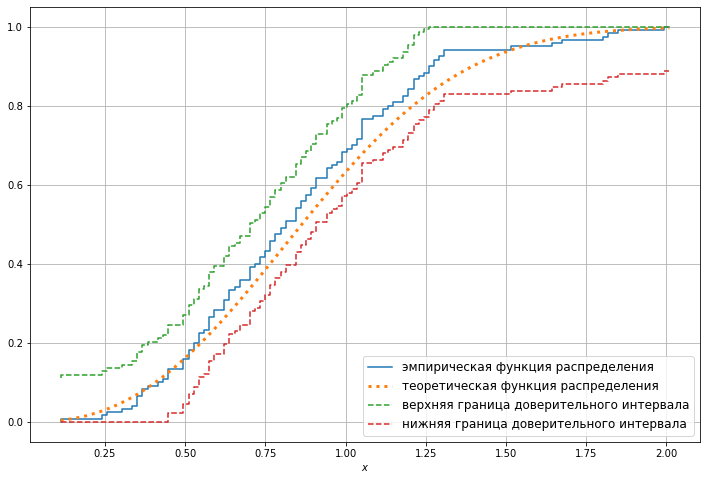

In [13]:
xlist = np.linspace(X.min(), X.max(), 120)
ylist = weibull(xlist, c)
upper = [R(cum, i, epsilon) for i in range(n)]
lower = [L(cum, i, epsilon) for i in range(n)]

plt.figure(figsize=(12, 8))

# эмпирическая функция распределения
plt.step(xlist, cum, linestyle='solid', label='эмпирическая функция распределения')
# теоретическая функция распределения
plt.plot(xlist, ylist, linestyle=':', linewidth=3, label='теоретическая функция распределения')
# верхняя граница
plt.step(xlist, upper, linestyle='--', label='верхняя граница доверительного интервала')
# нижняя граница
plt.step(xlist, lower, linestyle='--', label='нижняя граница доверительного интервала')

plt.xlabel('$x$')
plt.grid()
plt.legend(fontsize=12)
plt.show()

**Вывод**: в ходе данной работы удалось успешно смоделировать закон Вейбулла методом обратной функции. Значения выборочного среднего и выборочной дисперсии близки к теоретическим. Теоретическая функция лежит в доверительном интервале.